
Requirements

In [1]:
import pandas               as pd
import matplotlib.pyplot    as plt
import plotly.express       as px
import geopandas            as gpd
import seaborn              as sns
import folium               
from folium.plugins import HeatMapWithTime


pd.options.display.max_columns = None

# Dataset: Incidents Mobility

Algunas de las columnas son: 

- **source**: Fuente de información de incidentes de movilidad.
- **type**: Tipo de incidentes de movilidad.
- **state**: Estado de incidentes de movilidad.
- **priority**: Prioridad de incidentes de movilidad.
- **gravity**: Gravedad de incidentes de movilidad.
- **class**: Clase de incidentes de movilidad.
- **object**: Objeto de incidentes de movilidad.
- **actor**: Actor de incidentes de movilidad.
- **public**: Indica si es publico.
- **latitude**: Latitud del incidente.
- **longitude**: Longitud del incidente.
- **location**: Localización del incidente.
- **id_user**: Identificador del usuario relacionado al incidente. 
- **name_user**: Nombre del usuario relacionado al incidente. 
- **time_stamp**: Estampa de tiempo del incidente de movilidad.
- **implicated**: Implicado en el incidente de movilidad.
- **updatedate**: Fecha de actualización del incidente de movilidad.
- **orient**: Orientación del incidente de movilidad.
- **incident_time**: Momento del incidente de movilida.
- **name_user_modified**: Nombre del usuario modificado.
- **type_other**: Campo de texto libre. Se utiliza cuando un incidente es relacionado con una manifestación.

In [37]:
incidents_mobility = pd.read_csv('../0_datasets/raw/incidents/incidents_mobility_EneToJun2022.csv', parse_dates=['time_stamp', 'updatedate', 'incident_time']).sort_values(by="id")
incidents_mobility

id  source  type  state  priority  gravity  class  object  actor  \
1963   10667      56   6.0     71      54.0     26.0      1     NaN    NaN   
1971   10668      56   6.0     71      54.0     26.0      1     NaN    NaN   
2112   10669      56   6.0     71      54.0     26.0      1     NaN    NaN   
1989   10670      56   6.0     71      54.0     26.0      1     NaN    NaN   
1990   10671      56   9.0     71      54.0     26.0      1     NaN    NaN   
...      ...     ...   ...    ...       ...      ...    ...     ...    ...   
56664  76052      56   9.0     71      53.0     26.0      1     NaN    NaN   
56737  76053      56   6.0     71      53.0     25.0      1     NaN    NaN   
56804  76054      62  12.0     71      54.0      NaN      3     NaN    NaN   
56059  76055      56   7.0     71      53.0     26.0      1    42.0    NaN   
56907  76056      56   6.0     71      54.0     26.0      1     NaN    NaN   

       public  latitude  longitude            location  id_user  \
1963     True  4.600568 -74.178246                Bosa       44   
1971     True  4.619570 -74.139442             Kennedy       44   
2112     True  4.539066 -74.135452      Ciudad Bolivar       44   
1989     True  4.586573 -74.107651  Rafael Uribe Uribe       44   
1990     True  4.595927 -74.165718                Bosa       44   
...       ...       ...        ...                 ...      ...   
56664    True  4.624419 -74.082848         Teusaquillo      108   
56737    True  4.623401 -74.101967       Puente Aranda      108   
56804    True  4.578755 -74.092346            Santa Fe      108   
56059    True  4.500851 -74.085434                Usme      108   
56907    True  4.623316 -74.184479                Bosa      108   

             name_user          time_stamp  broker_id  implicated  \
1963     Karen Beltran 2022-01-01 00:07:20        NaN         2.0   
1971     Karen Beltran 2022-01-01 00:19:26      308.0         2.0   
2112     Karen Beltran 2022-01-01 00:58:40        NaN         2.0   
1989     Karen Beltran 2022-01-01 01:00:25        NaN         2.0   
1990     Karen Beltran 2022-01-01 01:02:57      302.0         1.0   
...                ...                 ...        ...         ...   
56664  FABIO  CARVAJAL 2022-06-12 23:23:32      327.0         1.0   
56737  FABIO  CARVAJAL 2022-06-12 23:33:30      318.0         2.0   
56804  FABIO  CARVAJAL 2022-06-12 23:41:26        NaN         NaN   
56059  FABIO  CARVAJAL 2022-06-12 23:42:34        NaN         1.0   
56907  FABIO  CARVAJAL 2022-06-12 23:43:05        NaN         2.0   

                              address          updatedate  zone_id  orient  \
1963   Calle 59 SUR Carrera 77K BIS A 2022-01-01 00:52:49      147     144   
1971        Av. Boyacá  Calle 15F SUR 2022-01-01 00:53:25      147     142   
2112         Calle 76A SUR Carrera 15 2022-01-01 02:23:38      147     144   
1989         Calle 23 SUR Carrera 24G 2022-01-01 02:24:25      147     145   
1990             Autosur  Carrera 72D 2022-01-01 02:24:53      147     144   
...                               ...                 ...      ...     ...   
56664                   NQS  Calle 24 2022-06-13 02:53:07      147     143   
56737             Calle 13 Carrera 43 2022-06-13 02:55:32      147     145   
56804                    KR 8 X CL 17 2022-06-13 00:42:39      147     168   
56059    Carrera 2 Este Calle 87A Sur 2022-06-13 02:55:43      147     142   
56907        Carrera 87 Calle 56B Sur 2022-06-13 02:55:56      148     168   

       require_support       incident_time  id_user_modified  \
1963               NaN 2021-12-31 23:40:00              44.0   
1971               NaN 2021-12-31 11:38:00              44.0   
2112               NaN 2022-01-01 00:20:00              44.0   
1989               NaN 2022-01-01 00:28:00              44.0   
1990               NaN 2022-01-01 00:30:00              44.0   
...                ...                 ...               ...   
56664              NaN 2022-06-12 22:52:00            

In [3]:
incidents_mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65389 entries, 1963 to 56907
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  65389 non-null  int64         
 1   source              65389 non-null  int64         
 2   type                63945 non-null  float64       
 3   state               65389 non-null  int64         
 4   priority            65388 non-null  float64       
 5   gravity             59051 non-null  float64       
 6   class               65389 non-null  int64         
 7   object              1678 non-null   float64       
 8   actor               0 non-null      float64       
 9   public              65389 non-null  bool          
 10  latitude            65389 non-null  float64       
 11  longitude           65389 non-null  float64       
 12  location            65389 non-null  object        
 13  id_user             65389 non-null  int64  

- `actor` and `require_support` have only null values.
- `public` has only True values.
- `location` has typos.
- `id_user`, `name_user`, `ìd_user_modified`, `name_user_modified` are not relevant.
- `time_stamp` and `update_time` are not relevant.
- `type_others` contains aditional infomation but is mostly null values.

A lot of categorical variables are in some kind of id form and need to be replaced with their corresponding names from the `incident_categories` dataset.

-----

In [38]:
mistakes = {"LOATION MISSING":"LOCATION MISSING",
            "SAN CRISTÓBAL":"SAN CRISTOBAL", 
            "RAFA.+":"RAFAEL URIBE URIBE",
            "ENG.+":"ENGATIVA",
            "LOS.+":"LOS MARTIRES",
            "(CANDELARIA)|(LA CANDELARIA)":"LA CANDELARIA",
            "CIUDAD.+":"CIUDAD BOLIVAR",
            "FONT.*":"FONTIBON",
            "SUBÁ":"SUBA",
            "SANTA.+": "SANTA FE"}
incidents_mobility["location"] = incidents_mobility["location"].str.upper().replace(mistakes, regex=True)


Select the relevant columns:

In [39]:
incidents_mobility = incidents_mobility[['id', 
       'source', 
       'type', 
       'state', 
       'priority', 'gravity',
       'class',
       'object', 
       # 'actor',
       # 'public', 
       'latitude', 'longitude', 'location',
       # 'id_user', 
       # 'name_user', 
       # 'time_stamp', 
       'broker_id', 
       'implicated',
       'address', 
       # 'updatedate',
       'zone_id', 'orient', 
       # 'require_support',
       'incident_time', 
       # 'id_user_modified', 'name_user_modified', 'type_others'
       ]]
incidents_mobility.head()

id  source  type  state  priority  gravity  class  object  latitude  \
1963  10667      56   6.0     71      54.0     26.0      1     NaN  4.600568   
1971  10668      56   6.0     71      54.0     26.0      1     NaN  4.619570   
2112  10669      56   6.0     71      54.0     26.0      1     NaN  4.539066   
1989  10670      56   6.0     71      54.0     26.0      1     NaN  4.586573   
1990  10671      56   9.0     71      54.0     26.0      1     NaN  4.595927   

      longitude            location  broker_id  implicated  \
1963 -74.178246                BOSA        NaN         2.0   
1971 -74.139442             KENNEDY      308.0         2.0   
2112 -74.135452      CIUDAD BOLIVAR        NaN         2.0   
1989 -74.107651  RAFAEL URIBE URIBE        NaN         2.0   
1990 -74.165718                BOSA      302.0         1.0   

                             address  zone_id  orient       incident_time  
1963  Calle 59 SUR Carrera 77K BIS A      147     144 2021-12-31 23:40:00  
1971       Av. Boyacá  Calle 15F SUR      147     142 2021-12-31 11:38:00  
2112        Calle 76A SUR Carrera 15      147     144 2022-01-01 00:20:00  
1989        Calle 23 SUR Carrera 24G      147     145 2022-01-01 00:28:00  
1990            Autosur  Carrera 72D      147     144 2022-01-01 00:30:00

### Data visualization

Incidents by day of the month

/tmp/ipykernel_1847/3041402470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents_mobility['incident_day'] = incidents_mobility["incident_time"].dt.to_period('d').dt.strftime('%d')


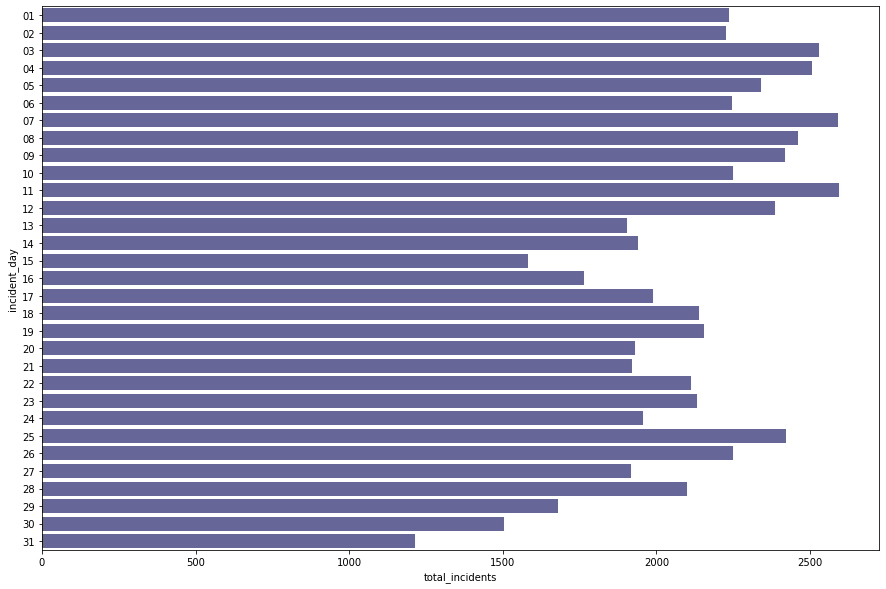

In [67]:
incidents_mobility['incident_day'] = incidents_mobility["incident_time"].dt.to_period('d').dt.strftime('%d')
incidents_x_day = incidents_mobility.groupby(by=['incident_day']).size().rename('total_incidents').to_frame().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=incidents_x_day,
            y='incident_day',
            x='total_incidents',
            orient='h',
            color='blue',
            saturation=0.2
            )
plt.show()

/tmp/ipykernel_1847/1275204746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents_mobility['incident_weekday'] = incidents_mobility["incident_time"].dt.weekday


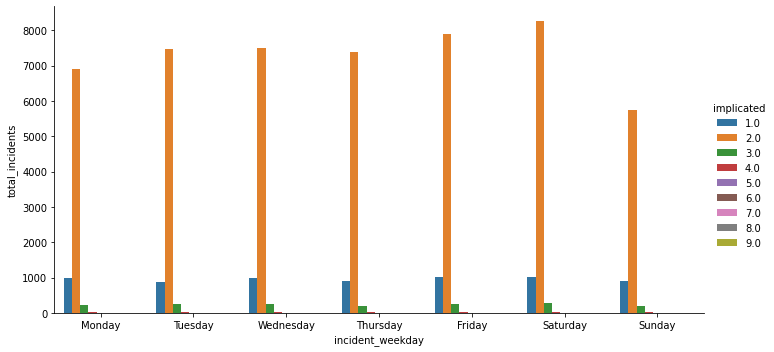

In [69]:
# Incidents by day of the week and implicated
weekdays = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

incidents_mobility['incident_weekday'] = incidents_mobility["incident_time"].dt.weekday
incidents_x_weekday = incidents_mobility.groupby(by=['incident_weekday','implicated']).size()\
    .rename('total_incidents').to_frame().reset_index()
incidents_x_weekday.incident_weekday = incidents_x_weekday.incident_weekday.map(weekdays)

sns.catplot(data=incidents_x_weekday,
            x='incident_weekday',
            y='total_incidents',
            hue='implicated',
            kind='bar',
            aspect=2
            )
plt.show()

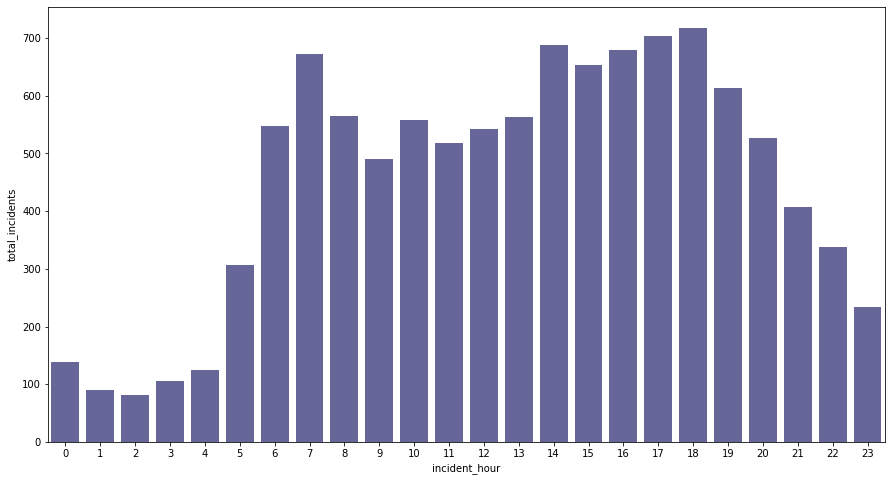

In [186]:
# Incidents by hour and implicated

incidents_mobility['incident_hour'] = incidents_mobility["incident_time"].dt.hour
incidents_x_hour = incidents_mobility.groupby(by=['incident_hour']).size()\
    .rename('total_incidents').to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data=incidents_x_hour,
            x='incident_hour',
            y='total_incidents',
            color='blue',
            saturation=0.2
            );

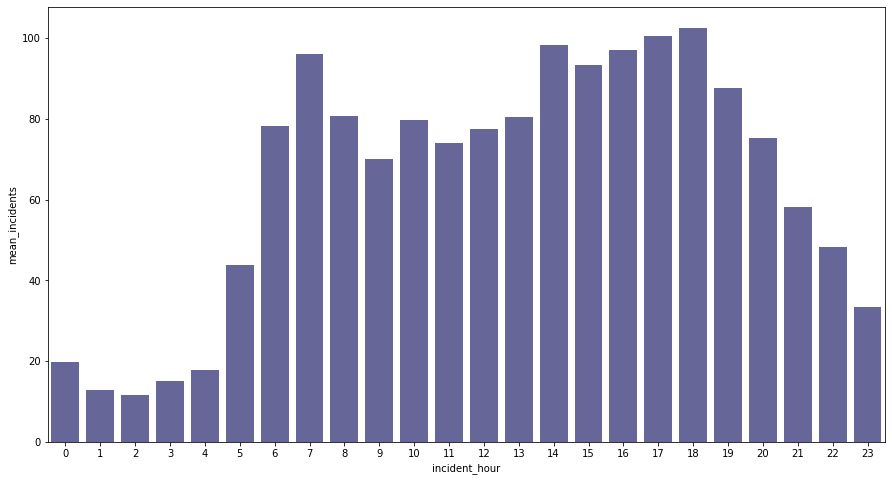

In [187]:
# Mean Incidents by hour
incidents_x_hour_mean = incidents_mobility.groupby(by=['incident_weekday','incident_hour']).size()\
    .rename('mean_incidents').to_frame().reset_index()\
    .groupby(by=['incident_hour']).mean().reset_index()


plt.figure(figsize=(15,8))
sns.barplot(data=incidents_x_hour_mean,
            x='incident_hour',
            y='mean_incidents',
            color='blue',
            saturation=0.2
            );

In [188]:
# Comparison between total incidentx and mean incidents per hour
incidents_x_hour.merge(incidents_x_hour_mean,
    how='left',
    left_on='incident_hour',
    right_on='incident_hour')[['incident_hour', 'total_incidents','mean_incidents']]

incident_hour  total_incidents  mean_incidents
0               0              139       19.857143
1               1               90       12.857143
2               2               82       11.714286
3               3              106       15.142857
4               4              124       17.714286
5               5              306       43.714286
6               6              547       78.142857
7               7              673       96.142857
8               8              565       80.714286
9               9              491       70.142857
10             10              558       79.714286
11             11              519       74.142857
12             12              543       77.571429
13             13              564       80.571429
14             14              688       98.285714
15             15              654       93.428571
16             16              680       97.142857
17             17              704      100.571429
18             18              718      102.571429
19             19              614       87.714286
20             20              526       75.142857
21             21              407       58.142857
22             22              338       48.285714
23             23              234       33.428571

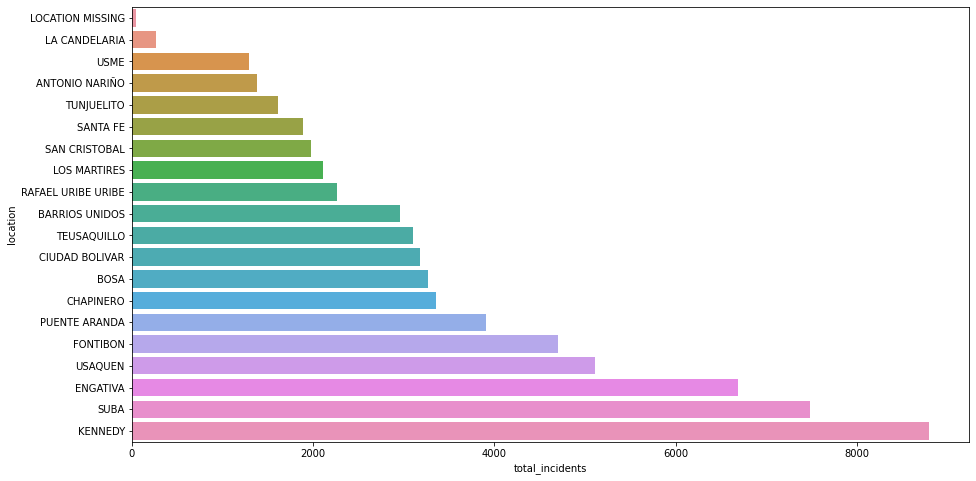

In [70]:
incidents_location_implicated = incidents_mobility.groupby(by=['location']).size()\
                                                                           .rename('total_incidents')\
                                                                           .to_frame().reset_index()\
                                                                           .sort_values(by="total_incidents")

plt.figure(figsize=(15,8))
sns.barplot(data=incidents_location_implicated,
            x='total_incidents',
            y='location',
            );

# Dataset: incidents_mobility_description

This dataset doesn't seem to be usefull for us.

In [190]:
incidents_mobility_description = pd.read_csv('../0_datasets/raw/incidents/incidents_mobility_description.csv')
incidents_mobility_description.head()

id  id_incident                                        description  \
0   1            1  2021-04-23 09:43 <Fecha 2021-04-23 y hora 11:2...   
1   2            2  2021-04-27 16:29 <Fecha 2021-04-27 y hora 17:3...   
2   3            1  Bomberos atiende la novedad y la vía se encuen...   
3   4            1  2021-04-23 09:43 <Fecha 2021-04-29 y hora 11:2...   
4   5            1  2021-04-23 09:43 <Fecha 2021-04-29 y hora 11:3...   

   id_user                          name_user           time_stamp  
0        3                     SKG Tecnología  2021-04-23 11:25:46  
1       23                       Javier Reyes  2021-04-27 17:31:42  
2       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:28:20  
3       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:29:39  
4       24  hrvelandia@movilidadbogota.gov.co  2021-04-29 11:37:46

# Dataset: incidents_categories

Este dataset contiene distintos tipos de categorizaciones relevantes al contexto de incidentes de transito, por ejemplo tiene categorizaciones de:
- Fuente de la información.
- Tipo de incidente.
- Tipo de implicados.
- Prioridad.
- Gravedad
- Estado
- Clase de incidente.
- Objeto relacionado con el incidente.

In [40]:
incidents_categories = pd.read_csv('../0_datasets/raw/incidents/incidents_categories.csv')
incidents_categories.head()

id  category_type  category_state     category_name  parent_id
0   1              2            True         Siniestro        NaN
1   2              2            True            Varado        NaN
2   3              2            True    Semaforización        NaN
3   4              2            True     Manifestación        NaN
4   5              2            True  Incidente en vía        NaN

In [4]:
incidents_categories[incidents_categories["parent_id"] == 1]

id  category_type  category_state               category_name  parent_id
5    6              3            True                      Choque        1.0
6    7              3            True   Choque contra objeto fijo        1.0
7    8              3            True                 Volcamiento        1.0
8    9              3            True                Autolesiones        1.0
9   10              3            True      Choque con volcamiento        1.0
23  25              4            True                      Simple        1.0
24  26              4            True               Con lesionado        1.0
25  27              4            True  Con fatalidad hospitalaria        1.0
26  28              4            True               Con fatalidad        1.0

In [ ]:
varados = incidents[incidents["class" == "Varado"]]
incidents[varados]["type"].fillna("Varado", inplace=True)

Los distintos tipos de categorizaciones:

In [7]:
cat_types = incidents_categories.groupby("category_type")["category_name"].apply(lambda x: list(x))
for idx, cats in enumerate(cat_types):
    print(f"{idx+1}: ", cats, end="\n\n")

1:  ['Chapinero', 'Santa Fe', 'San Cristóbal', 'Usme', 'Tunjuelito', 'Bosa', 'Kennedy', 'Suba', 'Barrios Unidos', 'Teusaquillo', 'Antonio Nariño', 'Puente Aranda', 'La Candelaria', 'Sumapaz', 'Usaquen', 'Fontibon', 'Engativa', 'Los Martires', 'Rafael Uribe Uribe', 'Ciudad Bolivar']

2:  ['Siniestro', 'Varado', 'Semaforización', 'Manifestación', 'Incidente en vía', 'Transporte masivo']

3:  ['Choque', 'Choque contra objeto fijo', 'Volcamiento', 'Autolesiones', 'Choque con volcamiento', 'Falla de energía', 'Mantenimiento correctivo', 'Mantenimiento preventivo', 'Reprogramación de equipo', 'Falla por sieniestro', 'Estudiantes', 'Conductores', 'Taxistas', 'Profesores', 'LGBT', 'Extranjeros', 'Mancha en vía', 'Caída de árbol', 'Objetos en vía', 'Posteria semáforos', 'Empozamiento o inundación', 'Incendio vehicular', 'Caída de ocupante', 'Aprisionamiento', 'Materiales peligrosos', 'Otros', 'Caída poste']

4:  ['Simple', 'Con lesionado', 'Con fatalidad hospitalaria', 'Con fatalidad', 'Plantón

Algunas de estas categorizaciones parecen ser subcategorizaciones de otras categorizaciones, por eso el campo `parent_id`.

In [8]:
incidents_categories_new = incidents_categories.merge(
    incidents_categories,
    how='left',
    left_on='parent_id',
    right_on='id')\
    [['id_x', 'category_type_x', 'category_name_x','category_name_y']]\
    .rename(columns={'id_x':'id', 'category_type_x': 'category_type', 'category_name_x':'subcategory', 'category_name_y': 'category'}
    )

incidents_categories_new['category'] = incidents_categories_new["category"].combine_first(incidents_categories_new["subcategory"])
incidents_categories_new.head(10)

id  category_type                subcategory          category
0   1              2                  Siniestro         Siniestro
1   2              2                     Varado            Varado
2   3              2             Semaforización    Semaforización
3   4              2              Manifestación     Manifestación
4   5              2           Incidente en vía  Incidente en vía
5   6              3                     Choque         Siniestro
6   7              3  Choque contra objeto fijo         Siniestro
7   8              3                Volcamiento         Siniestro
8   9              3               Autolesiones         Siniestro
9  10              3     Choque con volcamiento         Siniestro

Numero de incidentes según distintas categorizaciones:

In [9]:
def category_counts(category):
    return incidents_mobility[category].value_counts()\
                                        .reset_index()\
                                        .rename(columns={"index":category, category:"count"})\
                                        .merge(incidents_categories, left_on=category, right_on="id")\
                                        .drop(columns=["category_state", "parent_id"])

In [10]:
category_counts("source")

source  count   id  category_type   category_name
0       56   8855   56              8            NUSE
1       62    733   62              8  Semaforización
2       60    339   60              8           Gogev
3       58    321   58              8            Waze
4       63    249   63              8            TMSA
5       55    187   55              8         Cámaras
6       65     80   65              8  Gerente de vía
7       67     36   67              8             PMU
8       57     29   57              8           Redes
9       66     25   66              8  PONAL tránsito
10      59     13   59              8            IDRD
11     165      2  165              8          Idiger
12      61      1   61              8           Drone

Categorias de los tipos de incidentes:

In [11]:
category_counts("type")

type  count   id  category_type              category_name
0     6.0   8794    6              3                     Choque
1     9.0    529    9              3               Autolesiones
2    12.0    274   12              3   Mantenimiento correctivo
3    13.0    257   13              3   Mantenimiento preventivo
4     7.0    208    7              3  Choque contra objeto fijo
5    11.0    171   11              3           Falla de energía
6   174.0     80  174              3          Caída de ocupante
7    24.0     43   24              3             Caída de árbol
8     8.0     43    8              3                Volcamiento
9    14.0     39   14              3   Reprogramación de equipo
10  177.0     31  177              3                      Otros
11  169.0     26  169              3  Empozamiento o inundación
12   22.0     25   22              3             Objetos en vía
13   23.0     18   23              3              Mancha en vía
14   10.0     10   10              3     Choque con volcamiento
15  175.0     10  175              3            Aprisionamiento
16   16.0      9   16              3                Estudiantes
17  176.0      6  176              3      Materiales peligrosos
18  329.0      6  329              3                Caída poste
19  170.0      4  170              3         Incendio vehicular
20   19.0      3   19              3                 Profesores
21   17.0      3   17              3                Conductores
22  151.0      2  151              3         Posteria semáforos
23   15.0      1   15              3       Falla por sieniestro
24   18.0      1   18              3                   Taxistas

Categorizaciones del estado del incidente:

In [197]:
category_counts("state")

state  count   id  category_type          category_name
0     71  10851   71              9                Cerrado
1     69     14   69              9             Verificado
2    159      3  159              9  Termino gestión apoyo
3     70      1   70              9              Duplicado
4     68      1   68              9          Por verificar

Categorizaciones de la prioridad del incidente:

In [12]:
category_counts("priority")

priority  count   id  category_type category_name
0        54   6287   54              7             2
1        53   4231   53              7             1
2       157    278  157              7             3
3        52     74   52              7             0

Categorizaciones de la gravedad del incidente:

There's some duplicated values of gravities because they corresponde to diferent classes of incidents

In [13]:
category_counts("gravity")

gravity  count   id  category_type               category_name
0      25.0   6269   25              4                      Simple
1      26.0   3283   26              4               Con lesionado
2     180.0     82  180              4               Con lesionado
3      34.0     75   34              4            Afectación media
4      33.0     38   33              4             Afectación alta
5      31.0     25   31              4                Movilización
6      28.0     17   28              4               Con fatalidad
7      35.0     15   35              4             Afectación baja
8      27.0     14   27              4  Con fatalidad hospitalaria
9      30.0     11   30              4      Plantón con afectación
10    181.0      9  181              4                      Simple
11     29.0      7   29              4      Plantón sin afectación
12     32.0      4   32              4  Movilización con vehículos

In [200]:
incidents_categories[incidents_categories["id"].isin([181,25])]

id  category_type  category_state category_name  parent_id
23    25              4            True        Simple        1.0
204  181              4            True        Simple      173.0

In [201]:
incidents_categories[incidents_categories["id"].isin([1,173])]

id  category_type  category_state      category_name  parent_id
0      1              2            True          Siniestro        NaN
199  173              2            True  Transporte masivo        NaN

Categorizaciones de la clase del incidente:

In [202]:
category_counts("class")

class  count   id  category_type      category_name
0      1   9584    1              2          Siniestro
1      3    744    3              2     Semaforización
2      2    277    2              2             Varado
3      5    128    5              2   Incidente en vía
4    173     90  173              2  Transporte masivo
5      4     47    4              2      Manifestación

Categorizaciones del objeto relacionado con el incidente(si aplica).

In [203]:
category_counts("object")

object  count   id  category_type                category_name
0     42.0     49   42              6                    Separador
1    161.0     46  161              6                        Poste
2     47.0     43   47              6                     Vivienda
3     45.0     31   45              6                        Andén
4     44.0     16   44              6                        Árbol
5    128.0     14  128              6                       Aceite
6     43.0     10   43              6                        Pared
7    328.0     10  328              6       Alcantarilla destapada
8     50.0     10   50              6                       Cables
9     51.0      7   51              6                    Escombros
10   166.0      6  166              6            Señal de transito
11    48.0      4   48              6                         ACPM
12    41.0      3   41              6             Poste semafórico
13    46.0      1   46              6                   Hidratante
14   167.0      1  167              6  Puente peatonal o vehicular

Categorizaciones de corredores viales:

In [204]:
category_counts("broker_id")

broker_id  count   id  category_type                category_name
0       308.0    378  308             13                 Av Boyacá NS
1       320.0    376  320             13         Av Ciudad de Cali NS
2       309.0    287  309             13                 Av Boyacá SN
3       304.0    263  304             13            Av 1ra de Mayo EW
4       324.0    258  324             13                 Carrera 7 NS
5       301.0    184  301             13           Autopista norte SN
6       314.0    174  314             13                Av Caracas NS
7       317.0    166  317             13             Av Carrera 68 SN
8       327.0    165  327             13                       NQS SN
9       306.0    150  306             13               Av Américas EW
10      307.0    140  307             13               Av Américas WE
11      312.0    137  312             13               Av Calle 80 EW
12      326.0    132  326             13                       NQS NS
13      303.0    130  303             13             Autopista sur SN
14      316.0    126  316             13             Av Carrera 68 NS
15      318.0    124  318             13  Av Centenario (Calle 13) EW
16      300.0    124  300             13           Autopista norte NS
17      302.0    123  302             13             Autopista sur NS
18      311.0    118  311             13               Av Calle 26 WE
19      313.0    111  313             13               Av Calle 80 WE
20      321.0     87  321             13         Av Ciudad de Cali SN
21      310.0     86  310             13               Av Calle 26 EW
22      322.0     73  322             13                   Av Suba NS
23      315.0     70  315             13                Av Caracas SN
24      319.0     60  319             13  Av Centenario (Calle 13) WE
25      325.0     45  325             13                 Carrera 7 SN
26      305.0     45  305             13            Av 1ra de Mayo WE
27      323.0     43  323             13                   Av Suba SN

Categorizacines de zonas de la ciudad(?):

In [205]:
category_counts("zone_id")

zone_id  count   id  category_type category_name
0      147   5957  147             15        Zona 2
1      146   4904  146             15        Zona 1
2      148      9  148             15        Zona 3

Categorizaciones de orientaciones:

In [206]:
category_counts("orient")

orient  count   id  category_type        category_name
0     142   2594  142             14          Norte - sur
1     143   2419  143             14          Sur - Norte
2     168   2105  168             14      Sin orientación
3     144   1996  144             14  Oriente - Occidente
4     145   1756  145             14  Occidente - Oriente

# Dataset: incidents_implicated

In [41]:
incidents_implicated = pd.read_csv('../0_datasets/raw/incidents/incidents_implicated.csv').sort_values(by="incident_id")
incidents_implicated

id  incident_id  implicated_type  injured_count  dead_count
2            3            3            105.0              1           1
3            4            3            155.0              1           0
117590  222027            4            105.0              1           0
117589  222026            4            105.0              2           0
6            9            5            164.0              1           0
...        ...          ...              ...            ...         ...
97967   246979        68620            105.0              1           0
98148   246982        68621             95.0              0           0
98149   246983        68621            104.0              0           0
98151   246985        68622             95.0              0           0
98150   246984        68622            101.0              0           0

[120762 rows x 5 columns]

Categorias de implicados:

In [15]:
incidents_implicated["implicated_type"].value_counts()\
                                       .reset_index()\
                                       .rename(columns={"index":"implicated_type", "implicated_type":"count"})\
                                       .merge(incidents_categories, left_on="implicated_type", right_on="id")\
                                       .drop(columns=["category_state", "parent_id"])
                                

implicated_type  count   id  category_type                  category_name
0              95.0  52385   95             11                      Automóvil
1             105.0  25432  105             11                    Motocicleta
2              99.0   9321   99             11                           Taxi
3             101.0   8631  101             11                            Bus
4             103.0   6467  103             11                         Camión
5             104.0   5192  104             11                      Bicicleta
6              97.0   4293   97             11                      Camioneta
7             155.0   3471  155             11                         Peatón
8             163.0   1373  163             11                  Tracto camión
9             112.0    931  112             11  Vehiculo de servicio especial
10            116.0    708  116             11                       Volqueta
11            110.0    520  110             11                       Bicitaxi
12            107.0    312  107             11                     Ambulancia
13            114.0    283  114             11                           Grúa
14            130.0    254  130             11                 Bus articulado
15            164.0    219  164             11                      Micro bus
16            182.0    197  182             11                       Pasajero
17            162.0    165  162             11                        Carreta
18            171.0    120  171             11             Animal de compañia
19            118.0     80  118             11              Vehiculo de valor
20            120.0     75  120             11                       Patineta
21            131.0     61  131             11                           Otro
22            124.0     17  124             11                       Vivienda
23            122.0      5  122             11  Semoviente - animal silvestre
24            127.0      2  127             11                           Casa

# Combining the datasets

Merging `incidents_mobility` with `incidents_implicated`:

In [42]:
incidents = incidents_mobility.merge(
    incidents_implicated[['incident_id', 'implicated_type', 'injured_count','dead_count']],
    how='left',
    left_on='id',
    right_on='incident_id').drop(columns=["incident_id"])

incidents.head()

id  source  type  state  priority  gravity  class  object  latitude  \
0  10667      56   6.0     71      54.0     26.0      1     NaN  4.600568   
1  10667      56   6.0     71      54.0     26.0      1     NaN  4.600568   
2  10668      56   6.0     71      54.0     26.0      1     NaN  4.619570   
3  10668      56   6.0     71      54.0     26.0      1     NaN  4.619570   
4  10669      56   6.0     71      54.0     26.0      1     NaN  4.539066   

   longitude        location  broker_id  implicated  \
0 -74.178246            BOSA        NaN         2.0   
1 -74.178246            BOSA        NaN         2.0   
2 -74.139442         KENNEDY      308.0         2.0   
3 -74.139442         KENNEDY      308.0         2.0   
4 -74.135452  CIUDAD BOLIVAR        NaN         2.0   

                          address  zone_id  orient       incident_time  \
0  Calle 59 SUR Carrera 77K BIS A      147     144 2021-12-31 23:40:00   
1  Calle 59 SUR Carrera 77K BIS A      147     144 2021-12-31 23:40:00   
2       Av. Boyacá  Calle 15F SUR      147     142 2021-12-31 11:38:00   
3       Av. Boyacá  Calle 15F SUR      147     142 2021-12-31 11:38:00   
4        Calle 76A SUR Carrera 15      147     144 2022-01-01 00:20:00   

   implicated_type  injured_count  dead_count  
0            105.0            1.0         0.0  
1            105.0            1.0         0.0  
2             95.0            0.0         0.0  
3            105.0            1.0         0.0  
4             95.0            0.0         0.0

Replacing the category names from `incident_categories`:

In [43]:
categories_names = incidents_categories[["id", "category_name"]].set_index("id").squeeze()

def replace_categories(df, categories):
    for category in categories:
        df[category].replace(categories_names, inplace=True)
    return df

replace_categories(incidents, ["source", "type", "state",
                               "priority", "gravity", "class",
                               "object", "broker_id", "zone_id",
                               "orient", "implicated_type"]);

**Null Values**

Looking at the null values of the column `type` we find out that the most of them correspond to the `class` `varado`.

In [44]:
null_type = incidents[incidents["type"].isnull()]
null_type["class"].value_counts()

Varado              1444
Semaforización         2
Incidente en vía       1
Name: class, dtype: int64

In [45]:
varados = incidents["class"] == "Varado"
incidents.loc[varados, "type"] = "Varado"
incidents.dropna(subset=["type"], inplace=True)


In [53]:
wrong_time = incidents.loc[incidents["incident_time"].dt.month == 9, "incident_time"]
incidents.loc[incidents["incident_time"].dt.month == 9, "incident_time"] = wrong_time.map(lambda dt: dt.replace(month=4))

In [54]:
incidents.sort_values(by="incident_time")

id          source                       type    state priority  \
2       10668            NUSE                     Choque  Cerrado        2   
3       10668            NUSE                     Choque  Cerrado        2   
0       10667            NUSE                     Choque  Cerrado        2   
1       10667            NUSE                     Choque  Cerrado        2   
4       10669            NUSE                     Choque  Cerrado        2   
...       ...             ...                        ...      ...      ...   
114256  76053            NUSE                     Choque  Cerrado        1   
114258  76055            NUSE  Choque contra objeto fijo  Cerrado        1   
114259  76056            NUSE                     Choque  Cerrado        2   
114257  76054  Semaforización   Mantenimiento correctivo  Cerrado        2   
114060  75857  Semaforización           Falla de energía  Cerrado        1   

              gravity           class     object  latitude  longitude  \
2       Con lesionado       Siniestro        NaN  4.619570 -74.139442   
3       Con lesionado       Siniestro        NaN  4.619570 -74.139442   
0       Con lesionado       Siniestro        NaN  4.600568 -74.178246   
1       Con lesionado       Siniestro        NaN  4.600568 -74.178246   
4       Con lesionado       Siniestro        NaN  4.539066 -74.135452   
...               ...             ...        ...       ...        ...   
114256         Simple       Siniestro        NaN  4.623401 -74.101967   
114258  Con lesionado       Siniestro  Separador  4.500851 -74.085434   
114259  Con lesionado       Siniestro        NaN  4.623316 -74.184479   
114257            NaN  Semaforización        NaN  4.578755 -74.092346   
114060            NaN  Semaforización        NaN  4.662722 -74.133141   

              location                    broker_id  implicated  \
2              KENNEDY                 Av Boyacá NS         2.0   
3              KENNEDY                 Av Boyacá NS         2.0   
0                 BOSA                          NaN         2.0   
1                 BOSA                          NaN         2.0   
4       CIUDAD BOLIVAR                          NaN         2.0   
...                ...                          ...         ...   
114256   PUENTE ARANDA  Av Centenario (Calle 13) EW         2.0   
114258            USME                          NaN         1.0   
114259            BOSA                          NaN         2.0   
114257        SANTA FE                          NaN         NaN   
114060        FONTIBON         Av Ciudad de Cali NS         NaN   

                               address zone_id               orient  \
2            Av. Boyacá  Calle 15F SUR  Zona 2          Norte - sur   
3            Av. Boyacá  Calle 15F SUR  Zona 2          Norte - sur   
0       Calle 59 SUR Carrera 77K BIS A  Zona 2  Oriente - Occidente   
1       Calle 59 SUR Carrera 77K BIS A  Zona 2  Oriente - Occidente   
4             Calle 76A SUR Carrera 15  Zona 2  Oriente - Occidente   
...                                ...     ...                  ...   
114256             Calle 13 Carrera 43  Zona 2  Occidente - Oriente   
114258    Carrera 2 Este Calle 87A Sur  Zona 2          Norte - sur   
114259        Carrera 87 Calle 56B Sur  Zona 3      Sin orientación   
114257                    KR 8 X CL 17  Zona 2      Sin orientación   
114060                  AK 86 X CL 15A  Zona 2  Oriente - Occidente   

             incident_time implicated_type  injured_count  dead_count  
2      2021-12-31 11:38:00       Automóvil            0.0         0.0  
3      2021-12-31 11:38:00     Motocicleta            1.0         0.0  
0      2021-12-31 23:40:00     Motocicleta            1.0         0.0  
1      2021-12-31 23:40:00     Motocicleta            1.0         0.0  
4      2022-01-01 00:20:00       Automóvil            0.0         0.0  
...                    ...             ...            ...         ...  
114256 2022-06-12 23:14:00         

In [55]:
incidents.to_csv("../0_datasets/processed/incidents.csv.gz", index=False, compression="gzip")

### Map of incidents per day 

In [212]:
map = px.scatter_mapbox(incidents,
                  lat='latitude',
                  lon='longitude',
                  color='implicated',
                  color_continuous_scale="bluered",
                  zoom=11,
                  animation_frame="incident_day",
                  mapbox_style='open-street-map',
                  hover_data=['address', 'location', 'injured_count', 'dead_count', 'incident_time'],
                  )
map.update_layout(
    autosize=False,
    width=1300,
    height=900,)
map.show()

**********

### HeatMapWithTime of incidents per day

In [213]:
incidents_for_heatmap = list(incidents[["latitude", "longitude", "incident_day"]].groupby("incident_day")\
                            .apply(lambda df: [[lat,lon] for lat, lon in zip(df["latitude"], df["longitude"])]))

In [214]:
m = folium.Map(location=[4.624, -74.1], tiles="OpenStreetMap", zoom_start=11.5)
HeatMapWithTime(incidents_for_heatmap).add_to(m).add_to(m)
m

# Dataset: agents_May2022

In [2]:
ene = pd.read_csv("../0_datasets/raw/agents/agents_Ene2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])
feb = pd.read_csv("../0_datasets/raw/agents/agents_Feb2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])
mar = pd.read_csv("../0_datasets/raw/agents/agents_Mar2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])
may = pd.read_csv("../0_datasets/raw/agents/agents_May2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])
abr = pd.read_csv("../0_datasets/raw/agents/agents_Abr2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])
jun = pd.read_csv("../0_datasets/raw/agents/agents_Jun2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])

/tmp/ipykernel_1863/586259404.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ene = pd.read_csv("../0_datasets/raw/agents/agents_Ene2022.csv", parse_dates=['read_time', 'time_stamp', 'server_date_time'])


In [3]:
agents = pd.concat([ene, feb, mar, may, abr, jun])

In [4]:
agents.head()

id           dev_id           read_time          time_stamp  \
0  1641013210  868033050090275 2022-01-01 00:00:10 2022-01-01 00:00:04   
1  1641013811  868033050090275 2022-01-01 00:10:11 2022-01-01 00:00:04   
2  1641014411  868033050090275 2022-01-01 00:20:11 2022-01-01 00:00:04   
3  1641015012  868033050090275 2022-01-01 00:30:12 2022-01-01 00:00:04   
4  1641015613  868033050090275 2022-01-01 00:40:13 2022-01-01 00:00:04   

     server_date_time  stat_type     speed dev_name  altitude  heading  \
0 2022-01-01 00:00:10        NaN  5.700076    92883         0        0   
1 2022-01-01 00:10:11        NaN  5.700076    92883         0        0   
2 2022-01-01 00:20:11        NaN  5.700076    92883         0        0   
3 2022-01-01 00:30:12        NaN  5.700076    92883         0        0   
4 2022-01-01 00:40:13        NaN  5.700076    92883         0        0   

  grp_name                                               geom      localidad  \
0      S60  0101000020E6100000143FC6DCB58652C04A41B7973476...  PUENTE ARANDA   
1      S60  0101000020E6100000143FC6DCB58652C04A41B7973476...  PUENTE ARANDA   
2      S60  0101000020E6100000143FC6DCB58652C04A41B7973476...  PUENTE ARANDA   
3      S60  0101000020E6100000143FC6DCB58652C04A41B7973476...  PUENTE ARANDA   
4      S60  0101000020E6100000143FC6DCB58652C04A41B7973476...  PUENTE ARANDA   

   localidad_id  latitude  longitude     serialnumber  devicegroupid  
0            16  4.615435  -74.10485  868033050090275              6  
1            16  4.615435  -74.10485  868033050090275              6  
2            16  4.615435  -74.10485  868033050090275              6  
3            16  4.615435  -74.10485  868033050090275              6  
4            16  4.615435  -74.10485  868033050090275              6

In [5]:
agents.shape

(2154861, 18)

In [7]:
agents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154861 entries, 0 to 45264
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   dev_id            int64         
 2   read_time         datetime64[ns]
 3   time_stamp        datetime64[ns]
 4   server_date_time  datetime64[ns]
 5   stat_type         float64       
 6   speed             float64       
 7   dev_name          object        
 8   altitude          int64         
 9   heading           int64         
 10  grp_name          object        
 11  geom              object        
 12  localidad         object        
 13  localidad_id      int64         
 14  latitude          float64       
 15  longitude         float64       
 16  serialnumber      int64         
 17  devicegroupid     int64         
dtypes: datetime64[ns](3), float64(4), int64(7), object(4)
memory usage: 312.4+ MB


- `read_time` and `server_date_time` contain the same information.
- `dev_id` and `serialnumber` contain the same information.
- `stat_type` has no values.
- `altitude` and `heading` are always 0.
- `geom` doesn't seem to tells us much.
- `localidad` has some typos.
- `dev_name` has values other than digits, also it might be redundant with `dev_id`.

In [6]:
agents["localidad"].replace({"ANTONIO.*":"ANTONIO NARIÑO", "Engativa":"ENGATIVA"}, regex=True, inplace=True)

In [7]:
agents = agents[['id', 'dev_id', 
        'read_time',
        'time_stamp',
        # 'server_date_time',
        # 'stat_type',
        'speed', 
        # 'dev_name',
        # 'altitude',
        # 'heading',
        'grp_name',
        # 'geom',
        'localidad',
        # 'localidad_id',
        'latitude', 'longitude',
        # 'serialnumber',
        'devicegroupid']]
agents.head()

id           dev_id           read_time          time_stamp  \
0  1641013210  868033050090275 2022-01-01 00:00:10 2022-01-01 00:00:04   
1  1641013811  868033050090275 2022-01-01 00:10:11 2022-01-01 00:00:04   
2  1641014411  868033050090275 2022-01-01 00:20:11 2022-01-01 00:00:04   
3  1641015012  868033050090275 2022-01-01 00:30:12 2022-01-01 00:00:04   
4  1641015613  868033050090275 2022-01-01 00:40:13 2022-01-01 00:00:04   

      speed grp_name      localidad  latitude  longitude  devicegroupid  
0  5.700076      S60  PUENTE ARANDA  4.615435  -74.10485              6  
1  5.700076      S60  PUENTE ARANDA  4.615435  -74.10485              6  
2  5.700076      S60  PUENTE ARANDA  4.615435  -74.10485              6  
3  5.700076      S60  PUENTE ARANDA  4.615435  -74.10485              6  
4  5.700076      S60  PUENTE ARANDA  4.615435  -74.10485              6

In [8]:
agents.to_csv("../0_datasets/processed/agents.csv.gz", index=False, compression="gzip")

In [220]:
# Places that one agent has visited
agents[agents.dev_id == 868033050089715][['time_stamp', 'localidad']]\
.sort_values(by='time_stamp').reset_index(drop=True).head(20)

time_stamp           localidad
0  2022-05-01 00:01:40  RAFAEL URIBE URIBE
1  2022-05-01 00:55:37  RAFAEL URIBE URIBE
2  2022-05-01 01:13:07  RAFAEL URIBE URIBE
3  2022-05-01 02:45:44  RAFAEL URIBE URIBE
4  2022-05-01 05:43:58  RAFAEL URIBE URIBE
5  2022-05-01 06:56:35  RAFAEL URIBE URIBE
6  2022-05-01 07:54:35  RAFAEL URIBE URIBE
7  2022-05-01 08:25:07  RAFAEL URIBE URIBE
8  2022-05-04 19:38:40      CIUDAD BOLIVAR
9  2022-05-04 20:31:15                BOSA
10 2022-05-04 21:30:18                BOSA
11 2022-05-05 06:34:16  RAFAEL URIBE URIBE
12 2022-05-05 16:35:30  RAFAEL URIBE URIBE
13 2022-05-05 17:35:55  RAFAEL URIBE URIBE
14 2022-05-05 17:52:56  RAFAEL URIBE URIBE
15 2022-05-05 23:26:55       PUENTE ARANDA
16 2022-05-06 04:26:37                BOSA
17 2022-05-06 08:26:21  RAFAEL URIBE URIBE
18 2022-05-06 10:16:04  RAFAEL URIBE URIBE
19 2022-05-06 11:38:37  RAFAEL URIBE URIBE